In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Leer el archivo CSV
data = pd.read_csv('/content/drive/MyDrive/TP_IA_AVANZADA/content/DATOS_TRANSPORTE_BSAS.csv',sep=';')
#data = data.sample(500000)


# Dividir los datos en características de entrada (X) y etiquetas de salida (y)
X = data.drop('CANTIDAD', axis=1)
y = data['CANTIDAD']

# Convertir las características de entrada a one-hot encoding
X = pd.get_dummies(X)

# Normalizar los datos de entrada
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento/validacion  vs Pruebas
X_train_and_validation, X_test, y_train_and_validation, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

del X
del y

# Dividir los datos en conjuntos de entrenamiento vs validacion
X_train, X_validation, y_train, y_validation = train_test_split(X_train_and_validation, y_train_and_validation, test_size=0.20, random_state=42)


del scaler
del data
del X_train_and_validation
del y_train_and_validation

# Crear el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=25, verbose=1)




Mounted at /content/drive
Epoch 1/50
7870/7870 [==============================] - 38s 4ms/step - loss: 54523276.0000 - mean_absolute_error: 2810.1235
Epoch 2/50
7870/7870 [==============================] - 33s 4ms/step - loss: 16643656.0000 - mean_absolute_error: 1549.7897
Epoch 3/50
7870/7870 [==============================] - 30s 4ms/step - loss: 7610054.5000 - mean_absolute_error: 1297.4459
Epoch 4/50
7870/7870 [==============================] - 32s 4ms/step - loss: 5708843.5000 - mean_absolute_error: 1123.6818
Epoch 5/50
7870/7870 [==============================] - 33s 4ms/step - loss: 4687394.5000 - mean_absolute_error: 1010.4771
Epoch 6/50
7870/7870 [==============================] - 30s 4ms/step - loss: 4089356.7500 - mean_absolute_error: 931.4386
Epoch 7/50
7870/7870 [==============================] - 32s 4ms/step - loss: 3557949.0000 - mean_absolute_error: 868.0900
Epoch 8/50
7870/7870 [==============================] - 31s 4ms/step - loss: 3145007.5000 - mean_absolute_error: 

6148/6148 [==============================] - 12s 2ms/step
        Valor Esperado  Valor Predicho
85800             1912     1816.826172
244597           18350    17893.263672
51706              895      783.860718
220362           13388    13194.861328
96972             2381     2554.517090
217374           12893    13147.120117
33638              459      394.383636
41100              629      680.415405
165014            6626     7454.849121
59343             1092     1106.285034
154628            5797     6127.391602
20414              199      288.399414
283479           38297    38794.054688
244393           18299    18881.099609
49879              847      919.091736
285150           39837    40014.449219
13975              110      128.773758
262772           24212    23821.117188
220889           13483    13101.891602
20731              204      198.941818
24862              271      212.484863
25977              292      418.444275
16811              147       94.839996
99228 

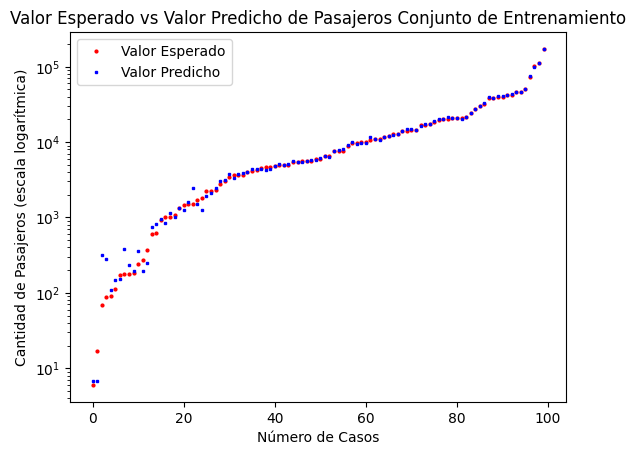

1537/1537 [==============================] - 3s 2ms/step
        Valor Esperado  Valor Predicho
243556           18086    17776.378906
220170           13355    11234.025391
180288            8016     7896.995605
262311           24009    25848.171875
306010          136721   133971.937500
130539            4176     4526.222656
73555             1498     1652.522461
181751            8154     8300.260742
304782          113244   111854.421875
14427              116      118.663040
25328              280      167.307526
213863           12346    14447.461914
94353             2264     2267.665039
51594              892      895.112061
87230             1964     1590.703491
86392             1933     1933.382446
181381            8120     7720.979004
172702            7298     7828.481934
224030           14044    12924.674805
265226           25366    24949.550781
305931          134141   130214.515625
118462            3502     4435.895508
295021           54614    55400.699219
180934 

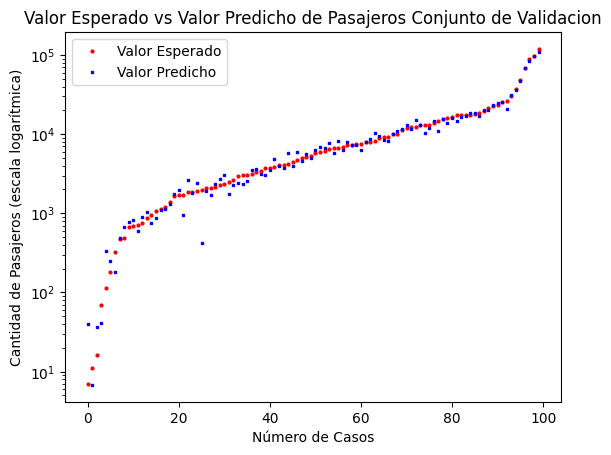

1922/1922 [==============================] - 3s 2ms/step
        Valor Esperado  Valor Predicho
21849              223      212.336456
282666           37605    37572.410156
58344             1066      765.566345
91223             2124     1469.991455
117357            3443     3741.288574
208184           11488    11047.566406
283241           38096    38054.769531
9155                55       83.567802
243076           17968    19357.667969
244302           18275    16587.968750
95724             2322     2881.987793
205387           11064    10236.494141
63900             1217     1064.486450
95015             2291     2248.596680
134569            4416     4495.197266
64550             1236     1419.060181
104580            2746     3339.245117
264055           24798    25060.457031
220099           13344    14410.017578
51256              883      960.870667
165655            6684     5408.495117
288426           43230    43436.902344
163698            6513     5873.044922
157844 

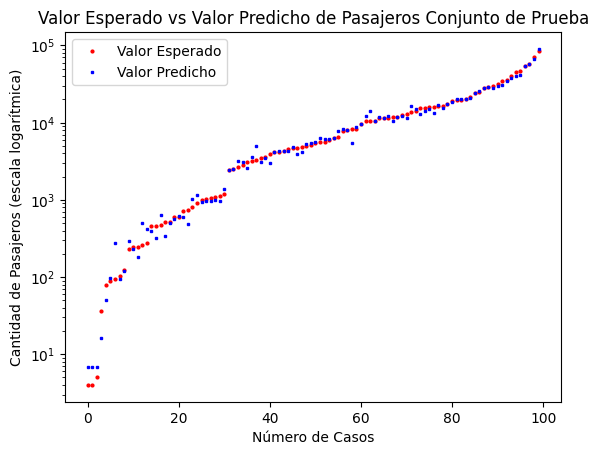

In [2]:
def evaluate_model(model_evaluated,data_set,result_set,title):

  #Realizar predicciones en el conjunto de prueba
  y_pred = model_evaluated.predict(data_set)

  # Crear un DataFrame con los valores esperados y predichos
  results = pd.DataFrame({'Valor Esperado': result_set, 'Valor Predicho': y_pred.flatten()})

  # Imprimir los últimos 25 registros
  print(results.tail(25))

  from sklearn.metrics import mean_absolute_error
  mae = mean_absolute_error(results["Valor Esperado"], results["Valor Predicho"])
  print("Mean Absolute Error:", mae)

  results = results.sample(100).sort_values(by=["Valor Esperado"])

  #Plotting with smaller points
  plt.plot(range(len(results["Valor Esperado"])),results["Valor Esperado"], 'ro', label='Valor Esperado', markersize=2)
  plt.plot(range(len(results["Valor Predicho"])),results["Valor Predicho"], 'bs', label='Valor Predicho', markersize=2)
  plt.yscale('log')

  #Customize the plot
  plt.xlabel('Número de Casos')
  plt.ylabel('Cantidad de Pasajeros (escala logarítmica)')
  plt.title('Valor Esperado vs Valor Predicho de Pasajeros ' + title)
  plt.legend()

  #Display the plot
  plt.show()
  plt.close()



evaluate_model(model,X_train,y_train,"Conjunto de Entrenamiento")
evaluate_model(model,X_validation,y_validation,"Conjunto de Validacion")
evaluate_model(model,X_test,y_test,"Conjunto de Prueba")




In [ ]:
del scaler
del data
del X
del y

NameError: ignored

# Sección nueva

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from google.colab import drive
import matplotlib.pyplot as plt

drive.mount('/content/drive')

# Leer el archivo CSV
data = pd.read_csv('/content/drive/MyDrive/TP_IA_AVANZADA/content/DATOS_TRANSPORTE.csv')

# Convertir los valores de las columnas booleanas a 1 o 0 (int)
data['ES_FERIADO'] = data['ES_FERIADO'].map({'SI': 1, 'NO': 0})
data['HAY_EVENTO'] = data['HAY_EVENTO'].map({'SI': 1, 'NO': 0})

# Dividir los datos en características de entrada (X) y etiquetas de salida (y)
X = data.drop('CANTIDAD', axis=1)
y = data['CANTIDAD']

# Convertir las características de entrada a one-hot encoding
X = pd.get_dummies(X)

# Normalizar los datos de entrada
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento/validacion  vs Pruebas
X_train_and_validation, X_test, y_train_and_validation, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir los datos en conjuntos de entrenamiento vs validacion
X_train, X_validation, y_train, y_validation = train_test_split(X_train_and_validation, y_train_and_validation, test_size=0.20, random_state=42)

# Crear el modelo de red neuronal
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
])

def evaluate_model(model_evaluated,data_set,result_set):
  # Evaluar el modelo en el conjunto de prueba
  loss, mean_absolute_error = model_evaluated.evaluate(data_set, result_set, verbose=0)
  print('Pérdida en el conjunto de prueba:', loss)
  print('Error absoluto medio en el conjunto de prueba:', mean_absolute_error)

  # Realizar predicciones en el conjunto de prueba
  y_pred = model_evaluated.predict(data_set)

  # Crear un DataFrame con los valores esperados y predichos
  results = pd.DataFrame({'Valor Esperado': result_set, 'Valor Predicho': y_pred.flatten()})

  return results


# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=1)


#Corremos con los datos de entrenamiento
result = evaluate_model(model,X_train,y_train)

# Obtener los últimos 20 registros del DataFrame
last_20_results = result.tail(20)

# Imprimir los últimos 20 registros
print(last_20_results)

# plotting a line graph
print("Line graph: ")
plt.scatter(result["Valor Esperado"], result["Valor Predicho"])
plt.show()



In [ ]:

#resultados = []
#y_test_numpy = y_test.to_numpy()
#limite = 1000

#for indice in range(len(X_test)):

  #if indice == limite:
    #break

  # Obtener la primera muestra del conjunto de datos
#  X_sample = X_test[indice].reshape(1, -1)

  # Realizar la predicción para la muestra
 # y_pred_sample = model.predict(X_sample)

  #print('Características de entrada del caso de prueba:')
  #print(X_sample)
  #print('Predicción del modelo para el caso de prueba:', y_pred_sample)
  #print('Valor real:', y_test_numpy[indice])

  # (real, prediccion)
  #resultados.append((y_test_numpy[indice], y_pred_sample))

NameError: ignored

In [ ]:
#for expected, predicted in resultados:
#  print(expected, predicted[0][0])